# Data wrangling with Pandas

The Pandas library provides a helpful and efficient framework to process and visualize (large) datasets.
This tutorial introduces some key features of the pandas library, and is a (lightly) modified version of a tutorial from [Aalto Scientific Computing](https://aaltoscicomp.github.io/python-for-scicomp/pandas/). See also ["10 minutes to pandas"](https://pandas.pydata.org/docs/user_guide/10min.html).


If you don't yet have the pandas library for python installed, you can do so by executing the following cell (note you only need to do this once -- after the installation completes, then you just need to import the library)

In [60]:
# uncomment the following line to install pandas
#!pip install pandas  

In [61]:
# once you have installed pandas, you can import it
# (along with numpy, which we will also be using)
import pandas as pd
import numpy as np

# Basic data structures in pandas
Pandas provides two types of classes for handling data:
1) [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series): a one-dimensional labeled array holding data of any type such as integers, strings, Python objects etc.
2) [DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame): a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns

Very loosely, a DataFrame is like a spreadsheet, with rows and columns, and a Series is like a single column from the DataFrame.

For more information, see the [Intro to data structures](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro) page.

# Object creation
We can read in a `.csv` file (comma-separated values) from the web -- in this case, a database of passengers on the Titanic. The data will be stored in a pandas DataFrame:

In [63]:
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
titanic = pd.read_csv(url, index_col='Name')

View the dataframe to get an idea of what it contains and print some summary statistics of its numerical data:

In [64]:
# print the first 5 lines of the dataframe
print(titanic.head())
# print summary statistics for each column
print(titanic.describe())

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Alle

Ok, so we have information on passenger names, survival (0 or 1), age, ticket fare, number of siblings/spouses, etc. With the summary statistics we see that the average age is 29.7 years, maximum ticket price is 512 USD, 38% of passengers survived, etc.

Let’s say we’re interested in the survival probability of different age groups. With two one-liners, we can find the average age of those who survived or didn’t survive, and plot corresponding histograms of the age distribution (`pandas.DataFrame.groupby()`, `pandas.DataFrame.hist()`):

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


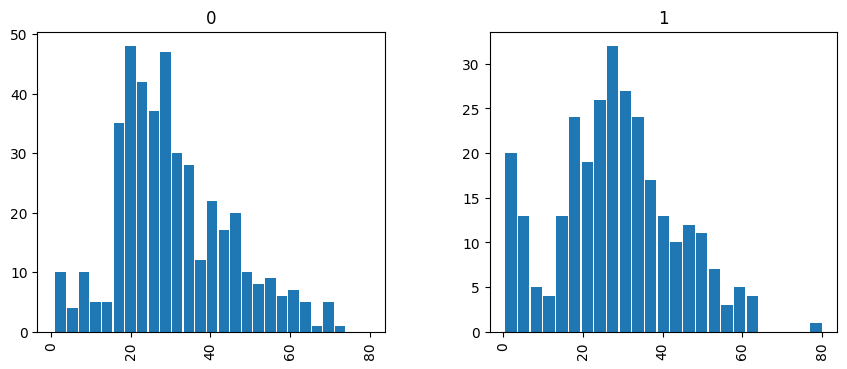

In [65]:
print(titanic.groupby("Survived")["Age"].mean())
titanic.hist(column='Age', by='Survived', bins=25, figsize=(10,4),
             layout=(1,2), zorder=2, sharex=True, rwidth=0.9);

Series and DataFrames have a lot functionality, but how can we find out what methods are available and how they work? One way is to visit the [API reference](https://pandas.pydata.org/docs/reference/frame.html) and reading through the list. Another way is to use the autocompletion feature in Jupyter and type e.g. `titanic["Age"].` in a notebook and then hit `TAB` twice - this should open up a list menu of available methods and attributes.

Jupyter also offers quick access to help pages (docstrings) which can be more efficient than searching the internet. Two ways exist:

Write a function name followed by question mark and execute the cell, e.g. write `titanic.hist?` and hit `SHIFT + ENTER`.

Write the function name and hit `SHIFT + TAB`.

Right click and select “Show contextual help”. This tab will update with help for anything you click.

# What’s in a DataFrame?
As we saw above, pandas dataframes are a powerful tool for working with tabular data. A pandas `pandas.DataFrame` is composed of rows and columns. Each column of a dataframe is a `pandas.Series` object - a dataframe is thus a collection of series

In [66]:
# print some information about the columns
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


Unlike a NumPy array, a dataframe can combine multiple data types, such as numbers and text, but the data in each column is of the same type. So we say a column is of type `int64` or of type `object`.

Let’s inspect one column of the Titanic passenger list data (first downloading and reading the titanic.csv datafile into a dataframe if needed, see above):

In [67]:
print(titanic["Age"])
print(titanic.Age)          # same as above
type(titanic["Age"]) # a pandas Series object

Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                               35.0
                                                       ... 
Montvila, Rev. Juozas                                  27.0
Graham, Miss. Margaret Edith                           19.0
Johnston, Miss. Catherine Helen "Carrie"                NaN
Behr, Mr. Karl Howell                                  26.0
Dooley, Mr. Patrick                                    32.0
Name: Age, Length: 891, dtype: float64
Name
Braund, Mr. Owen Harris                                22.0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    38.0
Heikkinen, Miss. Laina                                 26.0
Futrelle, Mrs. Jacques Heath (Lily May Peel)           35.0
Allen, Mr. William Henry                           

pandas.core.series.Series

The columns have names. Here’s how to get them (`columns`):

In [68]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

However, the rows also have names! This is what Pandas calls the `index`:

In [69]:
titanic.index

Index(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       ...
       'Markun, Mr. Johann', 'Dahlberg, Miss. Gerda Ulrika',
       'Banfield, Mr. Frederick James', 'Sutehall, Mr. Henry Jr',
       'Rice, Mrs. William (Margaret Norton)', 'Montvila, Rev. Juozas',
       'Graham, Miss. Margaret Edith',
       'Johnston, Miss. Catherine Helen "Carrie"', 'Behr, Mr. Karl Howell',
       'Dooley, Mr. Patrick'],
      dtype='object', name='Name', length=891)

We saw above how to select a single column, but there are many ways of selecting (and setting) single or multiple rows, columns and values. We can refer to columns and rows either by their name (`loc`, `at`) or by their index (`iloc`, `iat`):

In [90]:
# Uncomment one line at a time and re-run the cell to check the output/effect

#titanic.loc['Lam, Mr. Ali',"Age"]          # select single value by row and column

#titanic.loc[:'Heikkinen, Miss. Laina',"Survived":"Age"]  # slice the dataframe by row and column *names*
#titanic.iloc[0:3,1:5]                      # same slice as above by row and column *numbers*

#titanic.at['Heikkinen, Miss. Laina',"Age"] = 42      # set single value by row and column *name* (fast)
#titanic.at['Heikkinen, Miss. Laina',"Age"]           # select single value by row and column *name* (fast)
#titanic.iat[2,4]                           # select same value by row and column *number* (fast)

#titanic["is_passenger"] = True             # set a whole column

Dataframes also support boolean indexing, just like for `numpy` arrays:

In [93]:
titanic[titanic["Age"] > 70]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger
Name,,,,,,,,,,,,
"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,True
"Connors, Mr. Patrick",117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q,True
"Artagaveytia, Mr. Ramon",494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,True
"Barkworth, Mr. Algernon Henry Wilson",631,1,1,male,80.0,0,0,27042,30.0000,A23,S,True
"Svensson, Mr. Johan",852,0,3,male,74.0,0,0,347060,7.7750,NaN,S,True


In [94]:
# ".str" creates a string object from a column
titanic[titanic.index.str.contains("Margaret")]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_passenger
Name,,,,,,,,,,,,
"Devaney, Miss. Margaret Delia",45,1,3,female,19.0,0,0,330958,7.8792,NaN,Q,True
"Brown, Mrs. James Joseph (Margaret Tobin)",195,1,1,female,44.0,0,0,PC 17610,27.7208,B4,C,True
"Madigan, Miss. Margaret ""Maggie""",199,1,3,female,NaN,0,0,370370,7.7500,NaN,Q,True
"Fleming, Miss. Margaret",307,1,1,female,NaN,0,0,17421,110.8833,NaN,C,True
"Hays, Miss. Margaret Bechstein",311,1,1,female,24.0,0,0,11767,83.1583,C54,C,True
"Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)",320,1,1,female,40.0,1,1,16966,134.5000,E34,C,True
"Burns, Miss. Elizabeth Margaret",338,1,1,female,41.0,0,0,16966,134.5000,E40,C,True
"Ford, Miss. Doolina Margaret ""Daisy""",437,0,3,female,21.0,2,2,W./C. 6608,34.3750,NaN,S,True
"Murphy, Miss. Margaret Jane",613,1,3,female,NaN,1,0,367230,15.5000,NaN,Q,True


What if your dataset has missing data? Pandas uses the value `numpy.nan` to represent missing data, and by default does not include it in any computations. We can find missing values, drop them from our dataframe, replace them with any value we like or do forward or backward filling:

In [99]:
# Uncomment one line at a time and re-run the cell to check the output/effect

#titanic.isna()                    # returns boolean mask of NaN values
#titanic.dropna()                  # drop missing values
#titanic.dropna(how="any")         # or how="all"
#titanic.dropna(subset=["Cabin"])  # only drop NaNs from one column
#titanic.fillna(0)                 # replace NaNs with zero
#titanic.fillna(method='ffill')    # forward-fill NaNs

## Challenge: 
Compute the mean age of the first 10 passengers by slicing and the pandas.DataFrame.mean() method

In [100]:
titanic["Age"][0:10].mean()

29.88888888888889

# Time series superpowers
Pandas is very good at handling time series data. To show just a few examples, we will use a new dataset of Nobel prize laureates available through an API of the Nobel prize organisation at https://api.nobelprize.org/v1/laureate.csv .

Unfortunately this API does not allow 'non-browser requests', so `pandas.read_csv` will not work directly on it. Instead, we will use a copy that is available publicly on Github:

In [101]:
nobel = pd.read_csv("https://github.com/AaltoSciComp/python-for-scicomp/raw/master/resources/data/laureate.csv")
nobel.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,Prussia (now Germany),DE,Lennep (now Remscheid),Germany,DE,Munich,male,1901,physics,NaN,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,the Netherlands,NL,Arnhem,the Netherlands,NL,NaN,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,the Netherlands,NL,Zonnemaire,the Netherlands,NL,Amsterdam,male,1902,physics,NaN,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,France,FR,Paris,France,FR,NaN,male,1903,physics,NaN,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,France,FR,Paris,France,FR,Paris,male,1903,physics,NaN,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France


This dataset has three columns for time, “born”/”died” and “year”. These are represented as strings and integers, respectively, and need to be converted to datetime format. `pandas.to_datetime()` makes this easy:

In [102]:
# the errors='coerce' argument is needed because the dataset is a bit messy
nobel["born"] = pd.to_datetime(nobel["born"], errors ='coerce')
nobel["died"] = pd.to_datetime(nobel["died"], errors ='coerce')
nobel["year"] = pd.to_datetime(nobel["year"], format="%Y")

Pandas knows a lot about dates (using `.dt` accessor):

In [103]:
print(nobel["born"].dt.day)
print(nobel["born"].dt.year)
print(nobel["born"].dt.weekday)

0      27.0
1      18.0
2      25.0
3      15.0
4      15.0
       ... 
995     NaN
996     NaN
997    29.0
998    21.0
999     NaN
Name: born, Length: 1000, dtype: float64
0      1845.0
1      1853.0
2      1865.0
3      1852.0
4      1859.0
        ...  
995       NaN
996       NaN
997    1959.0
998    1972.0
999       NaN
Name: born, Length: 1000, dtype: float64
0      3.0
1      0.0
2      3.0
3      2.0
4      6.0
      ... 
995    NaN
996    NaN
997    1.0
998    4.0
999    NaN
Name: born, Length: 1000, dtype: float64


We can add a column containing the (approximate) lifespan in years rounded to one decimal:

In [104]:
nobel["lifespan"] = round((nobel["died"] - nobel["born"]).dt.days / 365, 1)

and then plot a histogram of lifespans:

array([[<Axes: title={'center': 'lifespan'}>]], dtype=object)

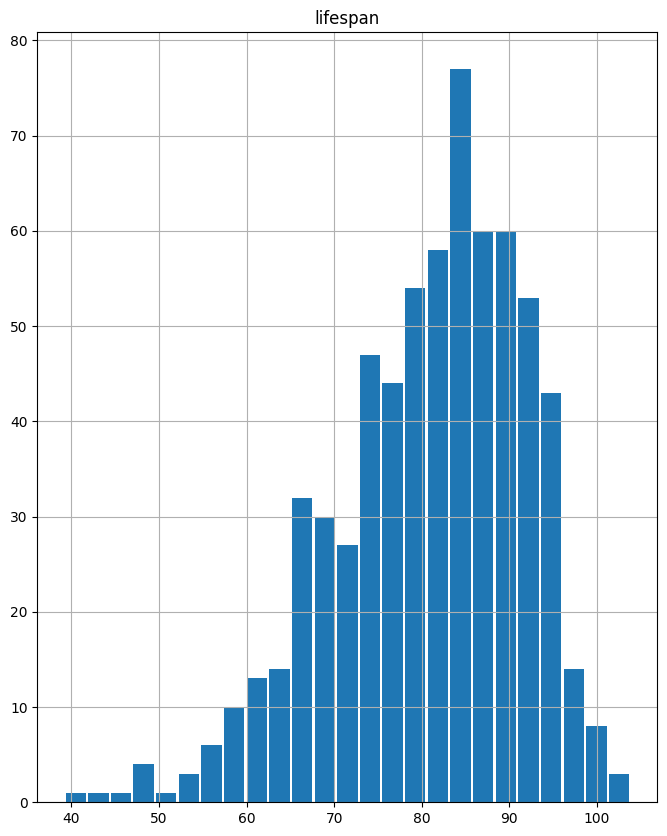

In [107]:
nobel.hist(column='lifespan', bins=25, figsize=(8,10), rwidth=0.9)

Finally, let’s see one more example of an informative plot (boxplot()) produced by a single line of code:

<Axes: title={'center': 'lifespan'}, xlabel='category'>

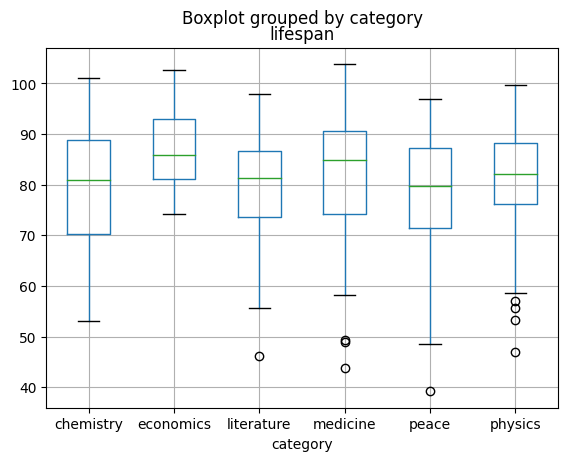

In [47]:
nobel.boxplot(column="lifespan", by="category")

Selecting a single row and column label returns a scalar:

# Challenge 1:
+ What country (of birth) has received the largest number of Nobel prizes, and how many? How many countries are represented in the dataset? Hint: use the describe method on the bornCountryCode column.

+ Create a histogram of the age when the laureates received their Nobel prizes. Hint: follow the above steps we performed for the lifespan.

+ List all the Nobel laureates from your country.

In [108]:
nobel['bornCountryCode'].describe()

count     969
unique     82
top        US
freq      292
Name: bornCountryCode, dtype: object

Index(['id', 'firstname', 'surname', 'born', 'died', 'bornCountry',
       'bornCountryCode', 'bornCity', 'diedCountry', 'diedCountryCode',
       'diedCity', 'gender', 'year', 'category', 'overallMotivation', 'share',
       'motivation', 'name', 'city', 'country', 'lifespan', 'ageAtAward'],
      dtype='object')


array([[<Axes: title={'center': 'ageAtAward'}>]], dtype=object)

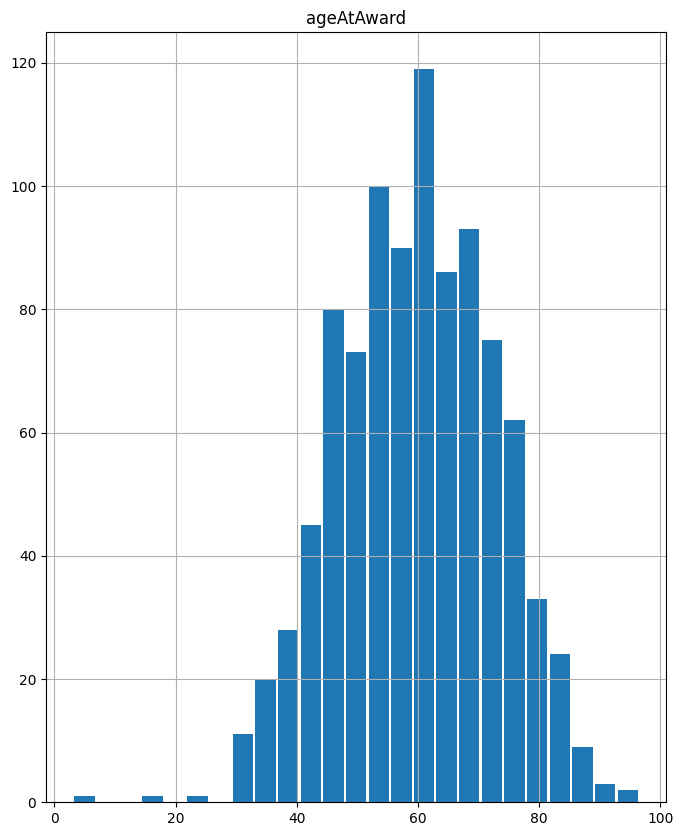

In [111]:
print(nobel.columns)
nobel['ageAtAward'] = round((nobel["year"] - nobel["born"]).dt.days / 365, 1)
nobel.hist(column='ageAtAward', bins=25, figsize=(8,10), rwidth=0.9)

In [119]:
myCountry = 'US'
nobel['fullname'] = nobel['firstname']+" "+nobel['surname']
print(nobel['fullname'][nobel['bornCountryCode'] == myCountry])
#names = nobel['fullname'][nobel['bornCountryCode'] == myCountry].to_list()
#print(names)

27     Robert A. Millikan
32      Arthur H. Compton
42       Carl D. Anderson
43       Clinton Davisson
46        Ernest Lawrence
              ...        
987       Douglas Diamond
988         Philip Dybvig
990         Drew Weissman
995            Louis Brus
999        Claudia Goldin
Name: fullname, Length: 292, dtype: object


# Challenge 2:
+ Define an array of 4 countries of your choice and extract only laureates who were born in these countries (you need to look at the data and find how countries are written)
  
+ Use `groupby()` to compute how many nobel prizes each country received in each category (by category, we mean nobel category: chemistry, econ, literature, medicine, physics, etc.) The `size()` method tells us how many rows, hence nobel prizes, are in each group

In [120]:
# List the country code that laureates were born in
print(nobel['bornCountryCode'].unique())

# Define a list of 4 country codes
countries = np.array(['GB', 'FR', 'US', 'IT'])

# Extract the subset of the dataframe for which the bornCountryCode is in that list
subset = nobel.loc[nobel['bornCountryCode'].isin(countries)]
#print(subset['bornCountryCode'])
# Count up the number of prizes by category for each country
subset.groupby(['bornCountryCode', 'category']).size()

['DE' 'NL' 'FR' 'PL' 'GB' 'SK' 'LU' 'IT' 'RU' 'SE' 'AU' 'CH' 'DK' 'US'
 'IN' 'AT' 'JP' 'IE' 'CN' 'AZ' 'HU' 'NO' 'PK' 'CA' 'DZ' 'NZ' 'LV' 'SI'
 'HR' 'FI' 'CZ' 'EG' 'BA' 'UA' 'LT' 'TW' 'KR' 'MX' 'ES' 'BE' 'ID' 'AR'
 'PT' 'ZA' 'BR' 'RO' 'VE' nan 'ZW' 'VN' 'BY' 'MK' 'CR' 'MM' 'GT' 'IL' 'TL'
 'CL' 'IS' 'GP' 'TR' 'GR' 'BG' 'CO' 'MG' 'NG' 'LC' 'TT' 'GH' 'IR' 'KE'
 'BD' 'PE' 'CY' 'LR' 'YE' 'MA' 'CD' 'IQ' 'ET' 'LB' 'PH' 'TN']


bornCountryCode  category  
FR               chemistry     11
                 economics      4
                 literature    12
                 medicine      12
                 peace         10
                 physics       12
GB               chemistry     28
                 economics      8
                 literature     7
                 medicine      28
                 peace         11
                 physics       24
IT               chemistry      1
                 economics      1
                 literature     6
                 medicine       5
                 peace          1
                 physics        6
US               chemistry     58
                 economics     54
                 literature    10
                 medicine      80
                 peace         19
                 physics       71
dtype: int64